In [35]:
import numpy as np
import pandas as pd

def calculate_bounding_box_volume(points):
    """
    Calculate the volume of the minimum bounding box containing the points.
    
    Args:
        points: numpy array of shape (n_points, n_dimensions)
    
    Returns:
        volume: float, the volume of the minimum bounding box
    """
    # Get min and max along each dimension
    min_coords = np.min(points, axis=0)
    max_coords = np.max(points, axis=0)
    
    # Calculate the length of each side of the box
    side_lengths = max_coords - min_coords
    
    # Calculate volume by multiplying all side lengths
    # Using log sum to avoid numerical overflow with high dimensions
    log_volume = np.sum(np.log(side_lengths + 1e-10))  # Adding small epsilon to handle zero-length sides
    volume = np.exp(log_volume)
    
    return volume, min_coords, max_coords, side_lengths

#file_path = "C:\\Users\\Cheig\\capstone\\Spectralify\\reccomendation\\processed_dataset.csv"
file_path = "C:\\Users\\Cheig\\capstone\\dh_stuff\\SHADXWBXRN_analysis_20250331_173555\\data\\processed_dataset2.csv"
# Load the dataset
print(f"Loading dataset from {file_path}...")
df = pd.read_csv(file_path)

# Remove song_id column if it exists
if 'song_id' in df.columns:
    df = df.drop('song_id', axis=1)

# Convert to numpy array for calculation
points = df.values

print(f"Dataset shape: {points.shape} (points, dimensions)")

# Calculate the volume
volume, min_coords, max_coords, side_lengths = calculate_bounding_box_volume(points)

print(f"\nVolume of the bounding box: {volume:.6e}")
print(f"Average side length: {np.mean(side_lengths):.6f}")
print(f"Minimum side length: {np.min(side_lengths):.6f}")
print(f"Maximum side length: {np.max(side_lengths):.6f}")

# Report dimensions with largest and smallest spreads
largest_dim = np.argmax(side_lengths)
smallest_dim = np.argmin(side_lengths)

print(f"\nDimension with largest spread: {largest_dim}")
print(f"  Range: [{min_coords[largest_dim]:.6f}, {max_coords[largest_dim]:.6f}], Length: {side_lengths[largest_dim]:.6f}")

print(f"Dimension with smallest spread: {smallest_dim}")
print(f"  Range: [{min_coords[smallest_dim]:.6f}, {max_coords[smallest_dim]:.6f}], Length: {side_lengths[smallest_dim]:.6f}")



Loading dataset from C:\Users\Cheig\capstone\dh_stuff\SHADXWBXRN_analysis_20250331_173555\data\processed_dataset2.csv...
Dataset shape: (65, 176) (points, dimensions)

Volume of the bounding box: 1.000000e-10
Average side length: 0.994318
Minimum side length: 0.000000
Maximum side length: 1.000000

Dimension with largest spread: 23
  Range: [0.000000, 1.000000], Length: 1.000000
Dimension with smallest spread: 27
  Range: [0.000000, 0.000000], Length: 0.000000


In [36]:
def main(file_path, song_ids):
    # Load the dataset
    print(f"Loading dataset from {file_path}...")
    df = pd.read_csv(file_path)
    
    # Validate that song_id column exists
    if 'song_id' not in df.columns:
        print("Error: Dataset does not contain a 'song_id' column.")
        return
    
    # Filter the dataset to only include the specified song_ids
    filtered_df = df[df['song_id'].isin(song_ids)]
    
    # Check if any song_ids were found
    if filtered_df.empty:
        print("Error: None of the provided song_ids were found in the dataset.")
        return
    
    # Report how many song_ids were found
    found_ids = filtered_df['song_id'].tolist()
    missing_ids = [id for id in song_ids if id not in found_ids]
    
    print(f"Found {len(found_ids)} out of {len(song_ids)} requested songs.")
    if missing_ids:
        print(f"Missing song_ids: {missing_ids}")
    
    # Remove song_id column for calculation
    filtered_df = filtered_df.drop('song_id', axis=1)
    
    # Convert to numpy array for calculation
    points = filtered_df.values
    
    print(f"Filtered dataset shape: {points.shape} (points, dimensions)")
    
    # Calculate the volume
    volume, min_coords, max_coords, side_lengths = calculate_bounding_box_volume(points)
    
    print(f"\nVolume of the bounding box for selected songs: {volume:.6e}")
    print(f"Average side length: {np.mean(side_lengths):.6f}")
    print(f"Minimum side length: {np.min(side_lengths):.6f}")
    print(f"Maximum side length: {np.max(side_lengths):.6f}")
    
    # Report dimensions with largest and smallest spreads
    largest_dim = np.argmax(side_lengths)
    smallest_dim = np.argmin(side_lengths)
    
    print(f"\nDimension with largest spread: {largest_dim}")
    print(f"  Range: [{min_coords[largest_dim]:.6f}, {max_coords[largest_dim]:.6f}], Length: {side_lengths[largest_dim]:.6f}")
    
    print(f"Dimension with smallest spread: {smallest_dim}")
    print(f"  Range: [{min_coords[smallest_dim]:.6f}, {max_coords[smallest_dim]:.6f}], Length: {side_lengths[smallest_dim]:.6f}")
    
    return volume, found_ids

main("C:\\Users\\Cheig\\capstone\\dh_stuff\\SHADXWBXRN_analysis_20250331_173555\\data\\processed_dataset2.csv", [1,2,3,4,5])

Loading dataset from C:\Users\Cheig\capstone\dh_stuff\SHADXWBXRN_analysis_20250331_173555\data\processed_dataset2.csv...
Found 5 out of 5 requested songs.
Filtered dataset shape: (5, 176) (points, dimensions)

Volume of the bounding box for selected songs: 1.298389e-110
Average side length: 0.340341
Minimum side length: 0.000000
Maximum side length: 0.823109

Dimension with largest spread: 8
  Range: [0.140679, 0.963788], Length: 0.823109
Dimension with smallest spread: 27
  Range: [0.000000, 0.000000], Length: 0.000000


(1.2983892583406903e-110, [1, 2, 3, 4, 5])

Loading dataset from C:\Users\Cheig\capstone\dh_stuff\SHADXWBXRN_analysis_20250331_173555\data\processed_dataset2.csv...
Found 5 out of 5 requested songs.
Dataset shape: (5, 176) (points, dimensions)
Dimension statistics saved to 'subset_dimension_stats.csv'
Volume of the bounding box: 1.298389e-110
Visualization saved to subset_dimension_ranges.png


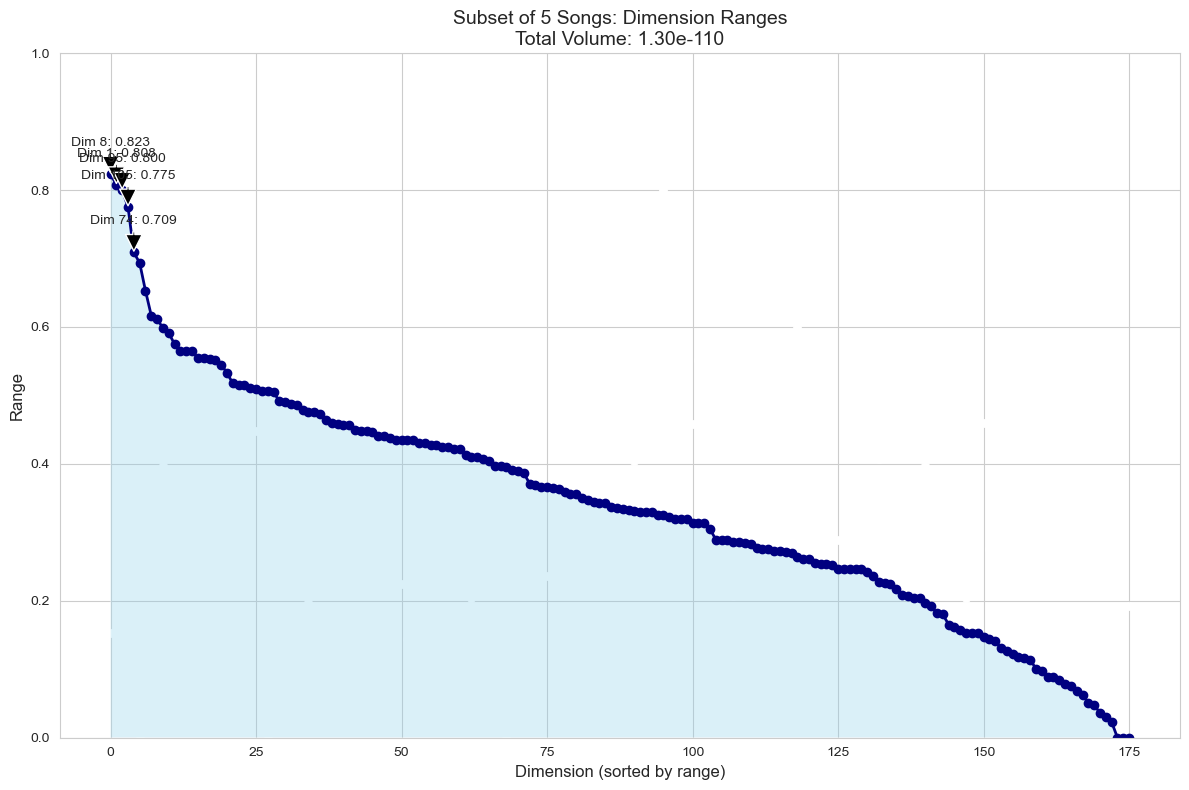

Contribution chart saved to subset_dimension_contribution.png


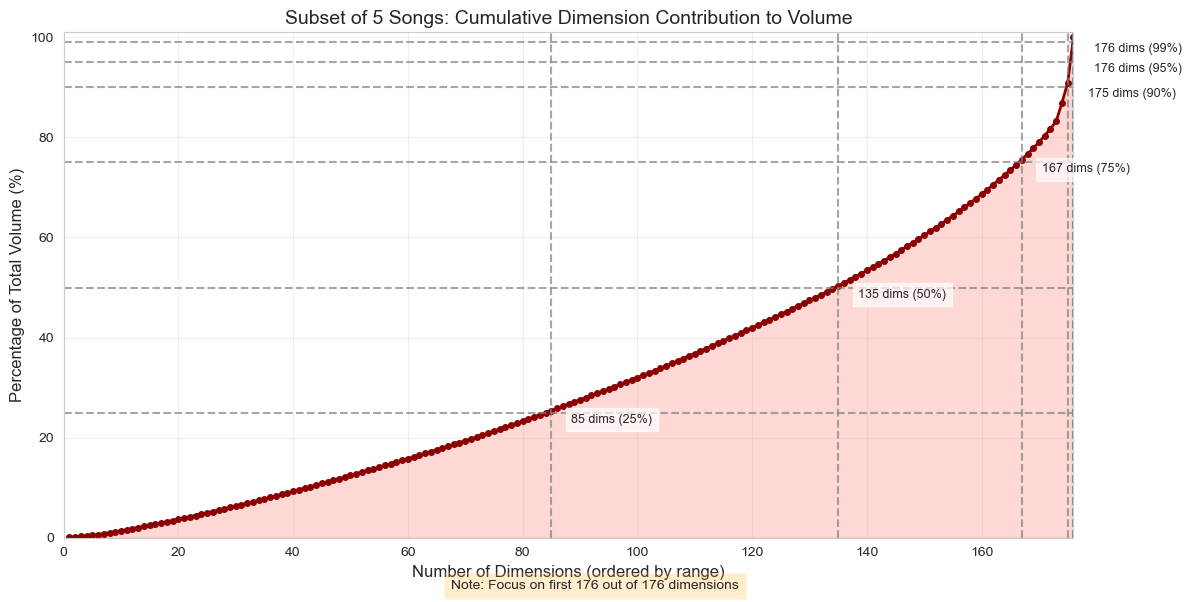

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Polygon

def calculate_dimension_ranges(points):
    """
    Calculate the range of each dimension in the dataset.
    
    Args:
        points: numpy array of shape (n_points, n_dimensions)
    
    Returns:
        ranges: array of ranges for each dimension
        min_coords: array of minimum values for each dimension
        max_coords: array of maximum values for each dimension
    """
    min_coords = np.min(points, axis=0)
    max_coords = np.max(points, axis=0)
    ranges = max_coords - min_coords
    
    return ranges, min_coords, max_coords

def visualize_dimension_ranges(points, title="Dimension Ranges Visualization", save_path=None):
    """
    Create a visualization of dimension ranges to represent volume.
    
    Args:
        points: numpy array of shape (n_points, n_dimensions)
        title: string, title for the plot
        save_path: string, path to save the figure (if None, display only)
    """
    # Calculate ranges for each dimension
    ranges, min_coords, max_coords = calculate_dimension_ranges(points)
    
    # Create a dataframe with dimension indices and their ranges
    df = pd.DataFrame({
        'dimension': range(len(ranges)),
        'range': ranges
    })
    
    # Sort dimensions by range (descending)
    df = df.sort_values('range', ascending=False).reset_index(drop=True)
    
    # Calculate log volume
    log_volume = np.sum(np.log(ranges + 1e-10))
    volume = np.exp(log_volume)
    
    # Create the visualization
    plt.figure(figsize=(12, 8))
    
    # Set style
    sns.set_style("whitegrid")
    
    # Plot the ranges
    ax = sns.scatterplot(x='dimension', y='range', data=df, alpha=1, color='white')
    ax.set_ylim([0,1])
    # Add a line connecting the tops of the bars
    x = np.arange(len(df))
    y = df['range'].values
    
    # Plot the line
    plt.plot(x, y, 'o-', color='navy', linewidth=2, markersize=6)
    
    # Create a polygon to fill under the curve
    verts = [(0, 0)] + list(zip(x, y)) + [(x[-1], 0)]
    poly = Polygon(verts, facecolor='skyblue', alpha=0.3)
    ax.add_patch(poly)
    
    # Set labels and title
    plt.xlabel('Dimension (sorted by range)', fontsize=12)
    plt.ylabel('Range', fontsize=12)
    plt.title(f"{title}\nTotal Volume: {volume:.2e}", fontsize=14)
    plt.yscale = 1
    # Add annotations for top 5 dimensions
    for i in range(min(5, len(df))):
        plt.annotate(f"Dim {df['dimension'].iloc[i]}: {df['range'].iloc[i]:.3f}",
                    xy=(i, df['range'].iloc[i]),
                    xytext=(i, df['range'].iloc[i] + max(df['range'].head(30)) * 0.05),
                    arrowprops=dict(facecolor='black', shrink=0.05, width=1.5),
                    ha='center')
    
    plt.tight_layout()
    
    # Save if path provided
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
        print(f"Visualization saved to {save_path}")
    
    plt.show()
    
    return df

def create_dimension_contribution_chart(ranges, title="Dimension Contribution to Volume", save_path=None):
    """
    Create a visualization showing the cumulative contribution of dimensions to the total volume.
    
    Args:
        ranges: sorted array of ranges for each dimension
        title: string, title for the plot
        save_path: string, path to save the figure (if None, display only)
    """
    # Calculate log contributions to avoid overflow
    log_ranges = np.log(ranges + 1e-10)
    
    # Calculate cumulative sum of log ranges
    cumulative_log_sum = np.cumsum(log_ranges)
    
    # Normalize to percentage of total
    total_log_sum = cumulative_log_sum[-1]
    percentage_contribution = (cumulative_log_sum / total_log_sum) * 100
    
    # Create DataFrame for plotting
    df_contrib = pd.DataFrame({
        'dimension_count': range(1, len(ranges) + 1),
        'percentage_of_volume': percentage_contribution
    })
    
    # Create the visualization
    plt.figure(figsize=(12, 6))
    
    # Plot percentage contribution
    plt.plot(df_contrib['dimension_count'], df_contrib['percentage_of_volume'], 
             '-o', color='darkred', linewidth=2, markersize=4)
    
    # Fill under the curve
    plt.fill_between(df_contrib['dimension_count'], df_contrib['percentage_of_volume'], 
                     alpha=0.3, color='salmon')
    
    # Add horizontal lines at key percentages
    for pct in [25, 50, 75, 90, 95, 99]:
        # Find the first dimension that exceeds the percentage
        try:
            dim_idx = np.where(percentage_contribution >= pct)[0][0]
            dim_count = dim_idx + 1
            plt.axhline(y=pct, linestyle='--', color='gray', alpha=0.7)
            plt.axvline(x=dim_count, linestyle='--', color='gray', alpha=0.7)
            plt.text(dim_count + len(ranges)*0.02, pct - 2, f"{dim_count} dims ({pct}%)", 
                    fontsize=9, bbox=dict(facecolor='white', alpha=0.7))
        except IndexError:
            continue
    
    # Set labels and title
    plt.xlabel('Number of Dimensions (ordered by range)', fontsize=12)
    plt.ylabel('Percentage of Total Volume (%)', fontsize=12)
    plt.title(title, fontsize=14)
    plt.grid(True, alpha=0.3)
    
    # Set y-axis to go from 0 to 100%
    plt.ylim(0, 101)
    
    # If we have many dimensions, limit x-axis or use log scale
    if len(ranges) > 100:
        necessary_dims = np.where(percentage_contribution >= 99)[0][0] + 1
        plt.xlim(0, min(necessary_dims * 1.2, len(ranges)))
        plt.figtext(0.5, 0.01, f'Note: Focus on first {min(necessary_dims * 1.2, len(ranges)):.0f} out of {len(ranges)} dimensions', 
                   ha='center', fontsize=10, bbox={"facecolor":"orange", "alpha":0.2, "pad":5})
    
    plt.tight_layout()
    
    # Save if path provided
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
        print(f"Contribution chart saved to {save_path}")
    
    plt.show()
    
    return df_contrib

def main(file_path, song_ids=None, song_ids_file=None):
    # Load the dataset
    print(f"Loading dataset from {file_path}...")
    df = pd.read_csv(file_path)

    # Filter by song_ids if provided
    if song_ids or song_ids_file:
        if not 'song_id' in df.columns:
            print("Error: Dataset does not contain a 'song_id' column.")
            return
        
        if song_ids_file:
            with open(song_ids_file, 'r') as f:
                song_ids = [line.strip() for line in f if line.strip()]
        
        filtered_df = df[df['song_id'].isin(song_ids)]
        
        if filtered_df.empty:
            print("Error: None of the provided song_ids were found in the dataset.")
            return
        
        found_ids = filtered_df['song_id'].tolist()
        missing_ids = [id for id in song_ids if id not in found_ids]
        
        print(f"Found {len(found_ids)} out of {len(song_ids)} requested songs.")
        if missing_ids:
            print(f"Missing song_ids: {missing_ids}")
        
        df = filtered_df
    
    # Remove song_id column if it exists
    if 'song_id' in df.columns:
        song_ids_present = df['song_id'].tolist()
        df = df.drop('song_id', axis=1)
    else:
        song_ids_present = None
    
    # Convert to numpy array for calculation
    points = df.values
    
    print(f"Dataset shape: {points.shape} (points, dimensions)")
    
    # Calculate dimension ranges
    ranges, min_coords, max_coords = calculate_dimension_ranges(points)
    
    # Create a DataFrame with dimension indices and their ranges
    dim_df = pd.DataFrame({
        'dimension': range(len(ranges)),
        'min_value': min_coords,
        'max_value': max_coords,
        'range': ranges
    })
    
    # Sort dimensions by range (descending)
    sorted_dim_df = dim_df.sort_values('range', ascending=False).reset_index(drop=True)
    
    # Save the sorted dimension info
    output_prefix = "subset" if song_ids or song_ids_file else "full_dataset"
    dim_stats_filename = f"{output_prefix}_dimension_stats.csv"
    sorted_dim_df.to_csv(dim_stats_filename, index=False)
    print(f"Dimension statistics saved to '{dim_stats_filename}'")
    
    # Calculate the volume
    log_volume = np.sum(np.log(ranges + 1e-10))
    volume = np.exp(log_volume)
    print(f"Volume of the bounding box: {volume:.6e}")
    
    # Create visualizations
    title_prefix = f"Subset of {len(points)} Songs" if song_ids or song_ids_file else f"Full Dataset ({len(points)} Items)"
    
    # Main range visualization
    visualize_dimension_ranges(points, 
                              title=f"{title_prefix}: Dimension Ranges",
                              save_path=f"{output_prefix}_dimension_ranges.png")
    
    # Dimension contribution visualization
    create_dimension_contribution_chart(sorted_dim_df['range'].values,
                                       title=f"{title_prefix}: Cumulative Dimension Contribution to Volume",
                                       save_path=f"{output_prefix}_dimension_contribution.png")
    
    return dim_df, volume, song_ids_present

if __name__ == "__main__":
    # "C:\\Users\\Cheig\\capstone\\dh_stuff\\SHADXWBXRN_analysis_20250331_173555\\data\\processed_dataset2.csv"
    # "C:\\Users\\Cheig\\capstone\\Spectralify\\reccomendation\\processed_dataset.csv"
    main("C:\\Users\\Cheig\\capstone\\dh_stuff\\SHADXWBXRN_analysis_20250331_173555\\data\\processed_dataset2.csv", [1,2,3,4,5])

In [31]:
def extract_extreme_song_ids(ordered_features_path):
    """
    Extract song IDs at the highest and lowest ends of each feature and save to a file.
    
    Args:
        ordered_features_path: Path to file with features and ordered song IDs
        output_file: File to save the list of extreme song IDs
    """
    # To store unique song IDs (no duplicates)
    extreme_song_ids = set()
    
    # Parse the ordered features file
    with open(ordered_features_path, 'r') as f:
        for line in f:
            line = line.strip()
                
            parts = line.split(',', 1)
            feature_name = parts[0].strip()
            song_ids_str = parts[1].strip()
            
            # Parse song IDs, handling different delimiter styles
            if ',' in song_ids_str:
                song_ids = [s.strip() for s in song_ids_str.split(',')]
            else:
                song_ids = song_ids_str.split()
            
            # Add the extreme songs (first and last) if we have at least 2 songs
            if len(song_ids) >= 2:
                extreme_song_ids.add(song_ids[0])   # Lowest value
                extreme_song_ids.add(song_ids[-1])  # Highest value
    
    # Convert to sorted list
    extreme_song_ids = sorted(list(extreme_song_ids))
    

    
    print(f"Extracted {len(extreme_song_ids)} unique song IDs at the extremes of features")

    for index, id in enumerate(extreme_song_ids):
        
        id = id.replace("[", "")
        id = id.replace("]", "")
        id = id.replace('"', "")
        extreme_song_ids[index] = int(id)
    return extreme_song_ids

if __name__ == "__main__":
    print(extract_extreme_song_ids("C:\\Users\\Cheig\\capstone\\Spectralify\\reccomendation\\ordered_songs_by_feature.csv"))

Extracted 188 unique song IDs at the extremes of features
[11732, 14243, 15053, 15058, 15447, 16337, 16405, 16415, 16423, 17901, 17969, 19288, 19723, 19726, 19728, 19729, 19730, 19731, 19732, 19734, 19735, 19736, 19738, 20757, 20764, 20993, 21213, 2123, 22292, 22296, 22317, 22455, 23778, 24189, 24529, 25244, 25270, 25494, 26237, 27536, 27560, 27822, 28277, 28345, 2851, 29467, 30233, 30416, 30777, 32206, 32340, 35782, 36080, 38800, 40094, 40105, 41456, 41863, 42959, 42974, 43523, 44212, 4440, 44717, 44731, 44806, 46232, 6049, 6796, 8521, 8529, 8547, 8599, 8995, 10329, 10352, 10363, 10367, 11816, 12750, 12976, 1426, 14534, 14827, 15053, 16341, 16356, 16376, 16423, 16814, 16872, 1736, 17733, 17775, 17901, 17969, 17989, 17992, 18000, 18557, 18572, 19726, 19727, 19728, 19732, 19735, 19791, 19850, 19851, 20452, 20583, 20757, 20764, 21002, 21009, 21017, 21219, 21657, 22455, 22478, 22882, 23119, 2343, 23618, 23849, 24134, 24529, 25487, 26237, 27536, 27560, 27822, 28277, 29932, 30512, 30777, 31